<h1>Links to all resources</h1>

In [80]:
# https://www.kaggle.com/datasets/skhand3/losses-in-thousands

<h1>Libraries</h1>

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib as mpl
from matplotlib import colors
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.colors as mcolors

<h1>First 5 Rows of Table</h1>

In [82]:
# opening file, need to use \\ since python sees one \ as escape char
df = pd.read_csv("CleanedDataset.csv")
# prints first 5 rows
#df.head()
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,2.928571,127.347884,71.273810,29.678571,149.907407,33.837831,0.649608,31.474868,0.501323
std,2.675902,31.917557,13.027649,10.568659,77.967981,7.170576,0.273264,9.901269,0.500329
min,0.000000,74.000000,24.000000,7.000000,16.000000,19.400000,0.127000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,22.000000,85.000000,28.900000,0.495000,24.000000,0.000000
50%,2.000000,124.000000,71.000000,30.000000,135.000000,33.600000,0.620000,28.000000,1.000000
75%,5.000000,150.000000,80.000000,37.000000,192.250000,37.400000,0.808000,36.000000,1.000000
max,10.000000,198.000000,110.000000,60.000000,392.000000,67.100000,1.400000,63.000000,1.000000


<h1>Print Rows and Columns from csv File, Print Type of Data from Each Column</h1>

In [83]:
print('Rows, Cols:', df.shape, '\n')
print('Types of Data:', end = '\n')
print(df.dtypes)

Rows, Cols: (756, 9) 

Types of Data:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


<h1>Histograms</h1>

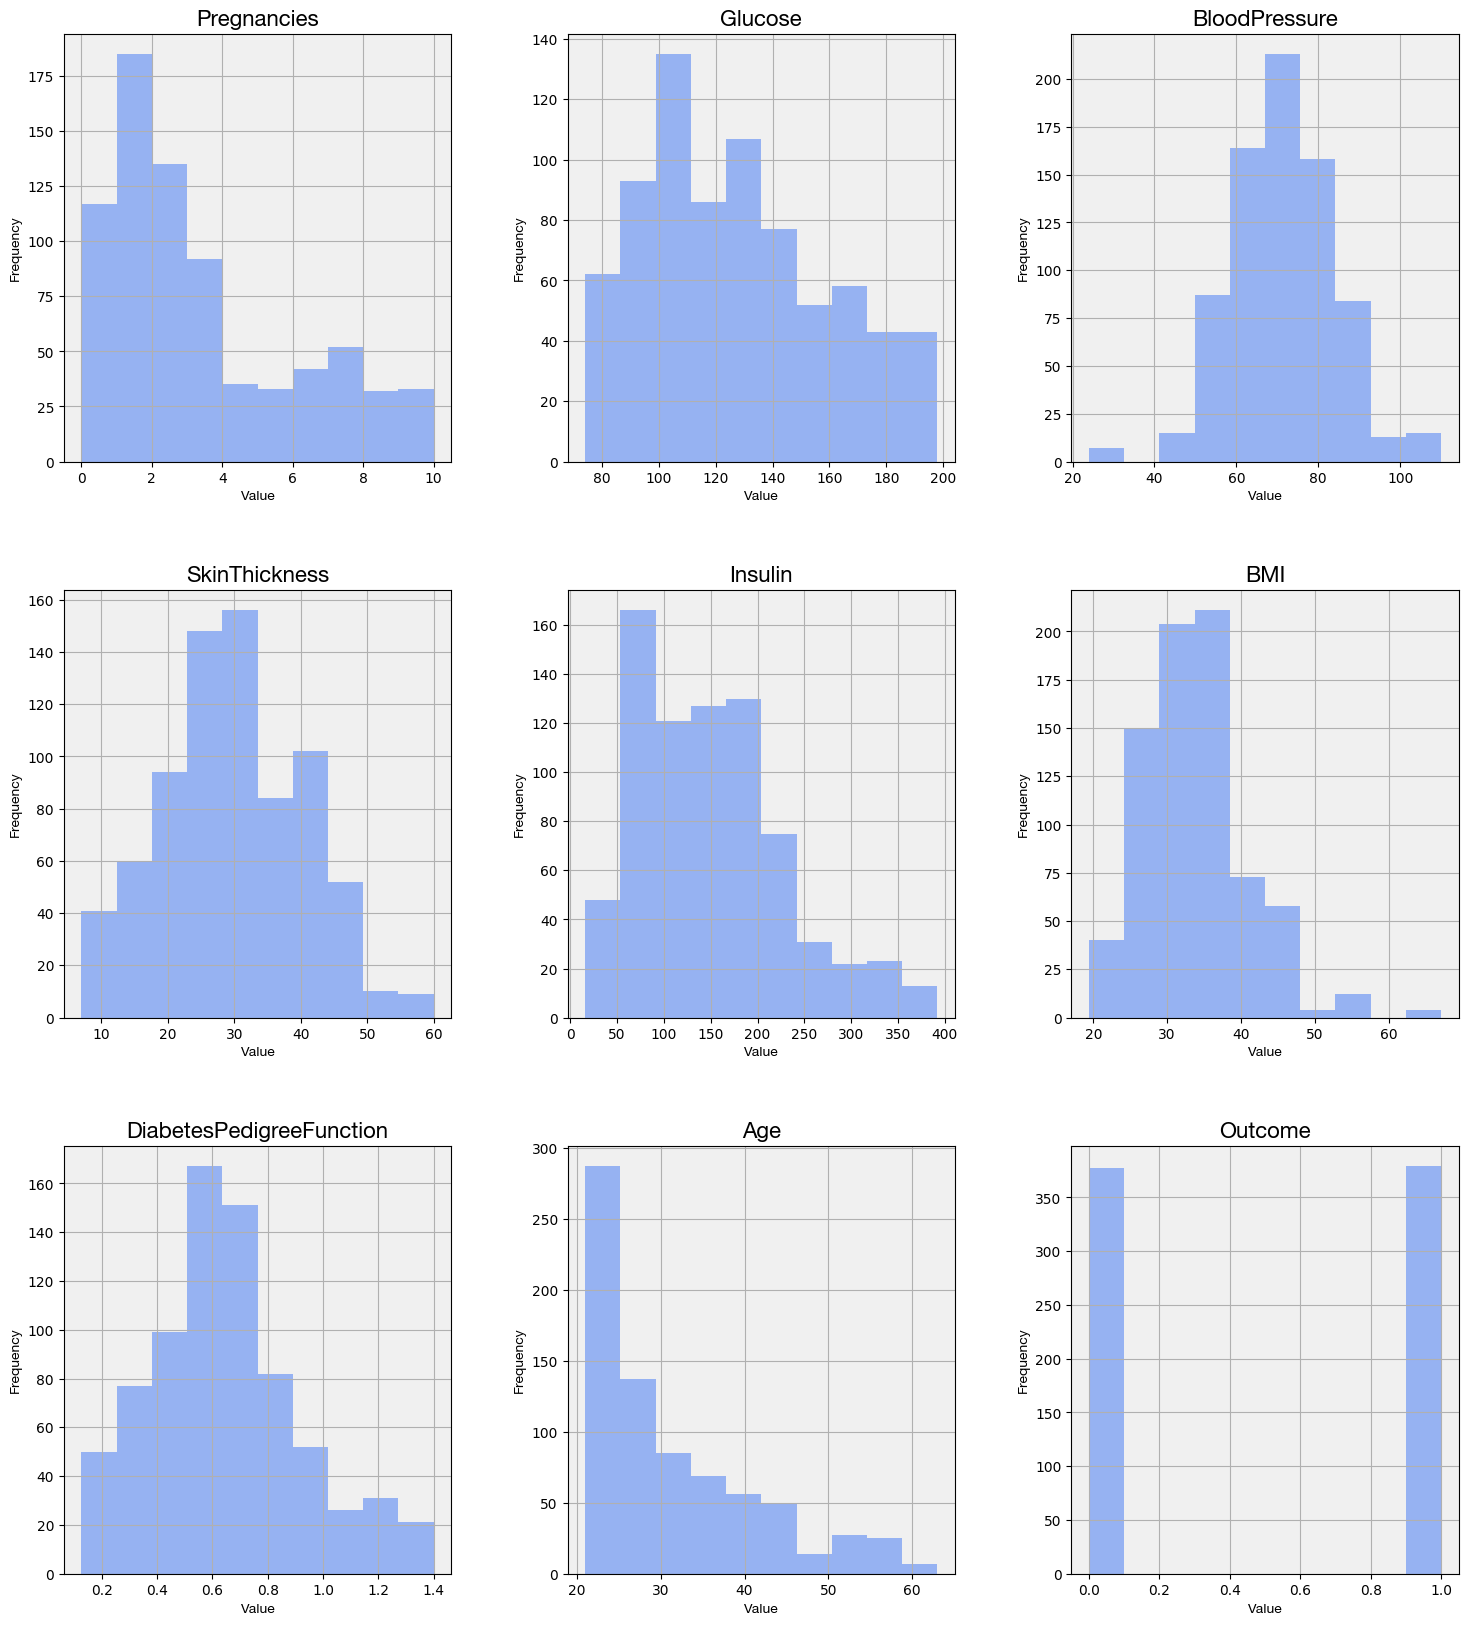

In [85]:
# creating histograms
histogram = df.hist(figsize=(18,20), color = '#96b2f2')

for ax in histogram.flatten():
    # setting background color for each histogram
    ax.set_facecolor('#f0f0f0')

    # labeling all x/y axes
    ax.set_xlabel("Value", fontname = 'Helvetica Neue')
    ax.set_ylabel("Frequency", fontname = 'Helvetica Neue')

    # labeling all titles
    ax.set_title(ax.get_title(), fontname='Helvetica Neue', fontsize=16)

# printing all graphs
plt.show()


# rows to delete (based on histograms):

# more than 10 pregnancies -- outlier
# glucose levels at 0 -- not possible
# blood pressure at 0 --  not possible
# insulin past 400 -- outlier
# skin thickness past 60 -- outlier
# skin thickness at 0 -- not possible
# BMI at 0 -- not possible
# not sure if we should delete pedigree past 1.5 as the range is already so low
# ages past 70 -- outlier
# --  remember to mention during presentation that most of the test was run on people around 20-30 yrs old

multiple graphs of each category, with diff axes (takes a while to execute, currently takes 36 secs)

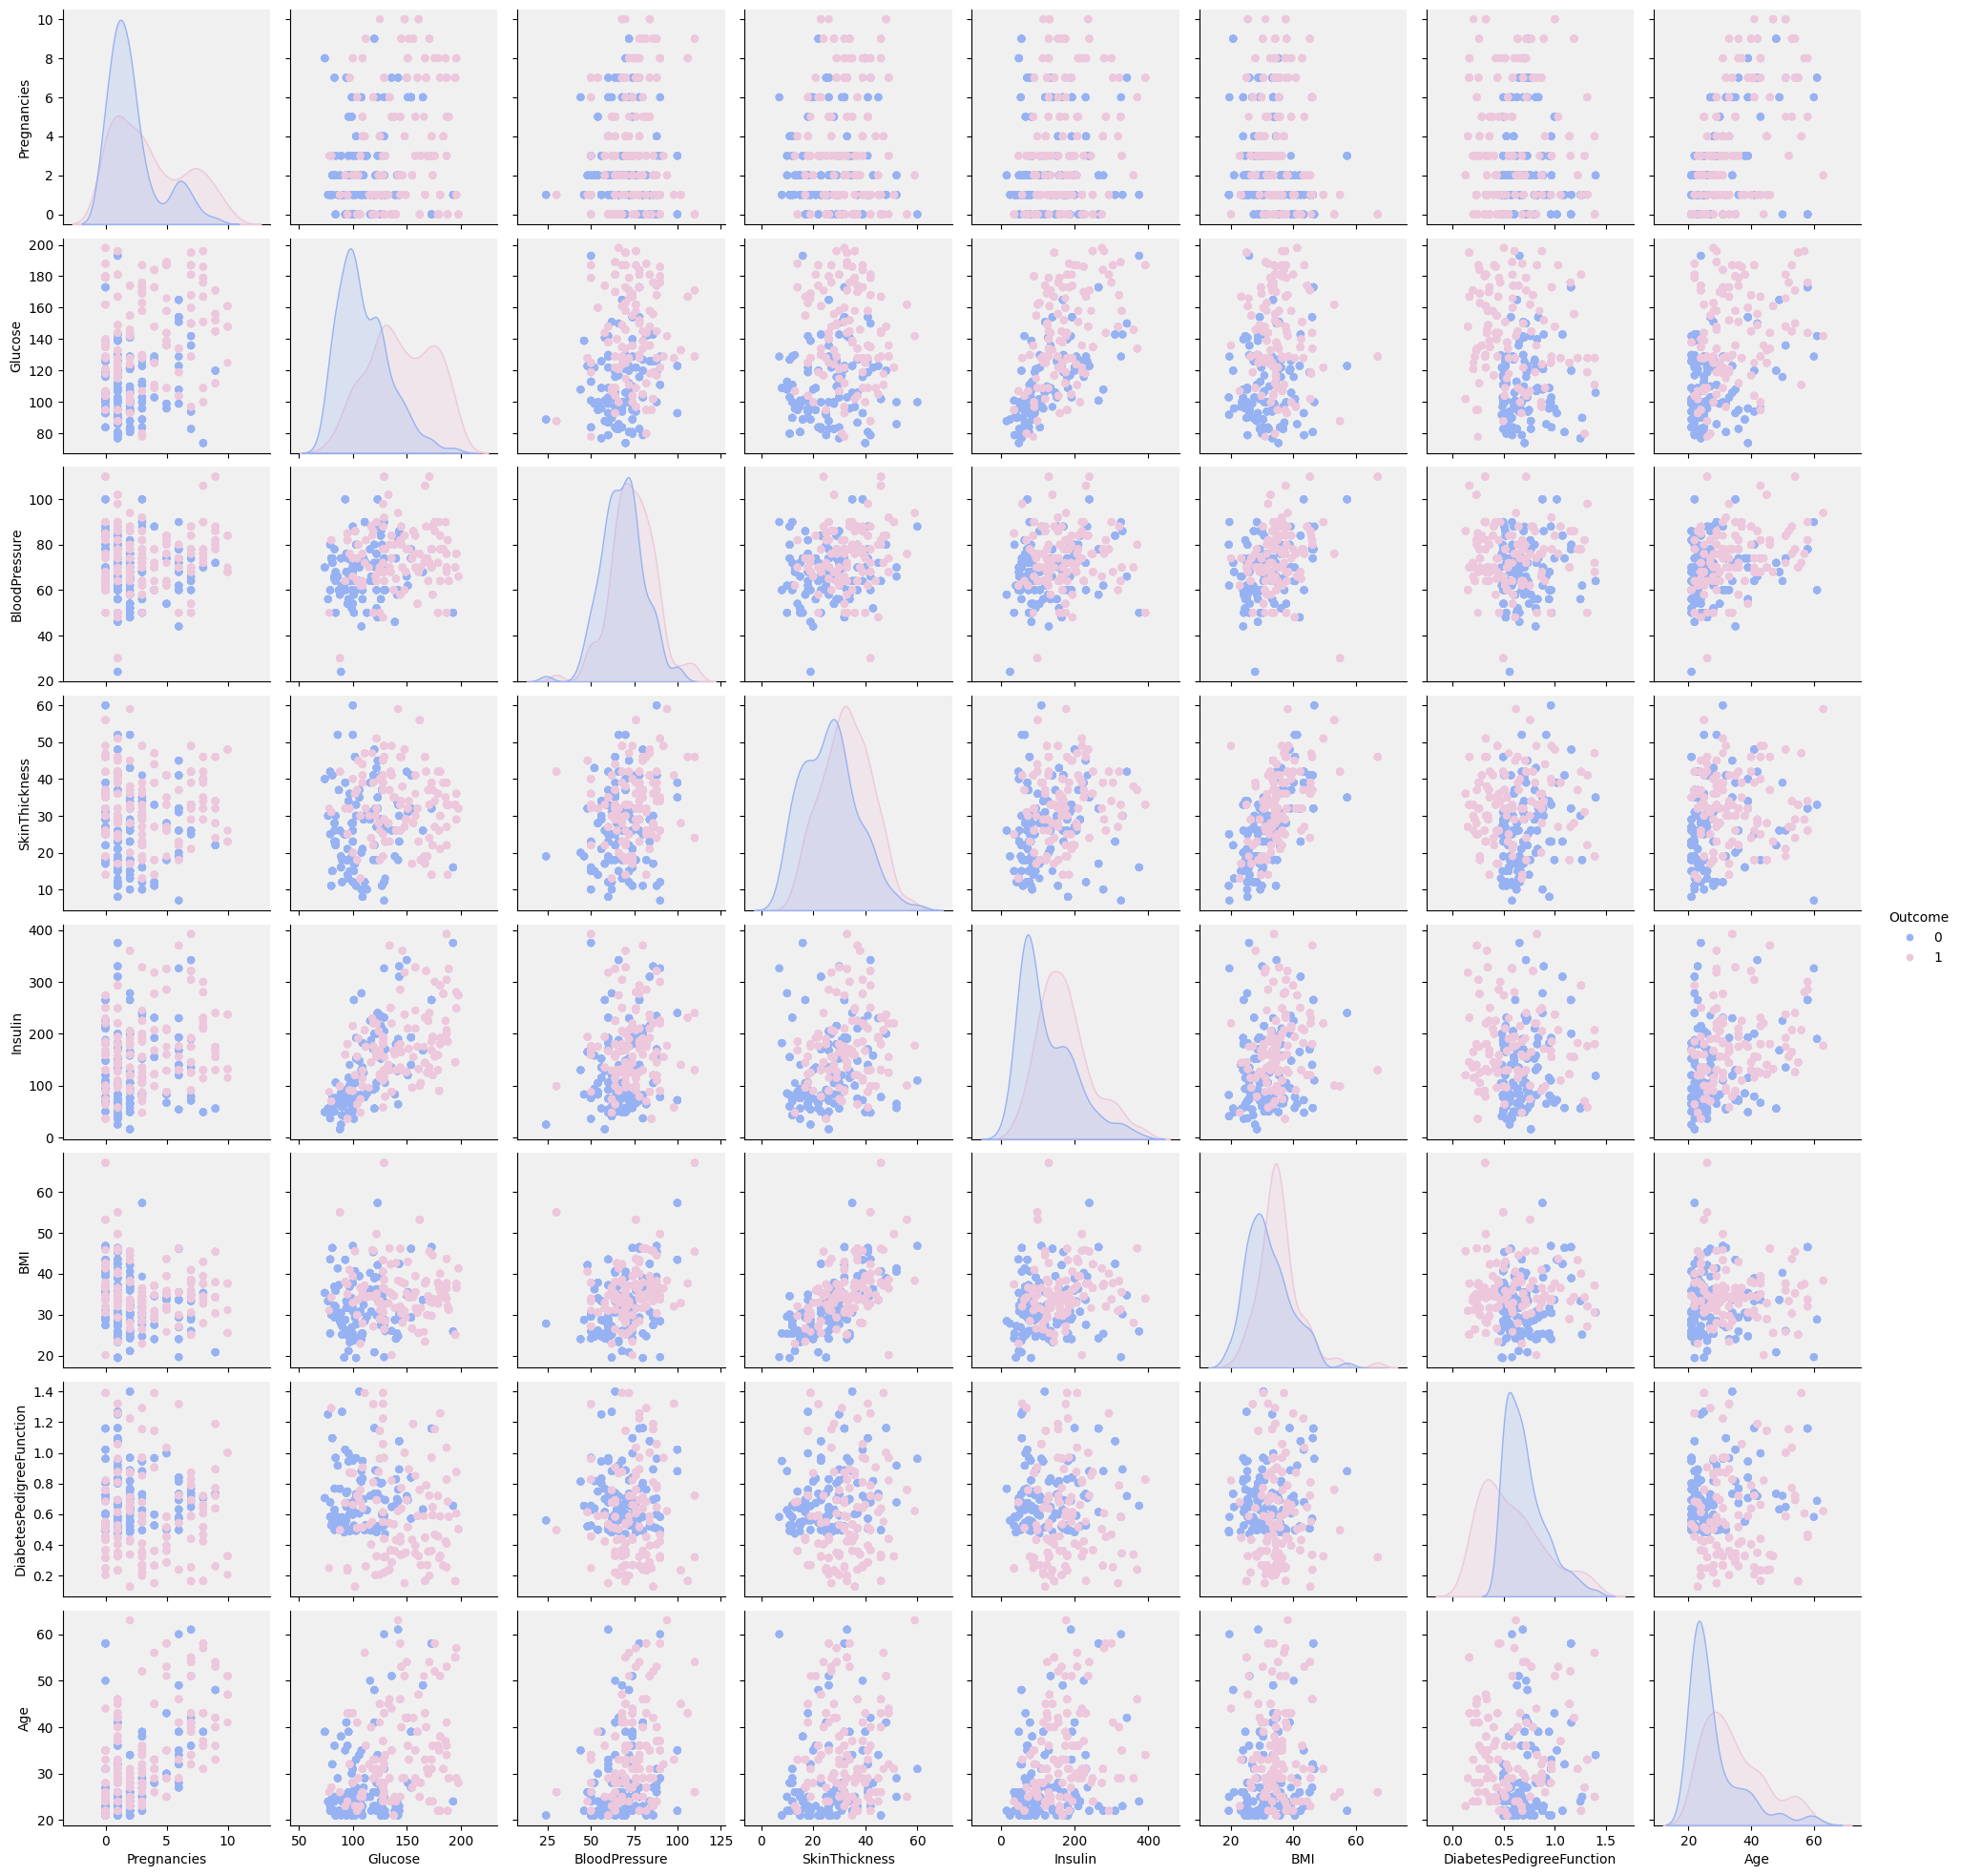

In [86]:
# palette for legend (editable)
myPalette = [ "#96b2f2", "#edc7dc"]

# creating actual plots
# change 'pastel' to myPalette if using custom palette above
myPlot = sns.pairplot(df, hue = 'Outcome', palette = myPalette)

# setting background color of each graph
background_color = '#f0f0f0'

for ax in myPlot.axes.flatten():
    ax.set_facecolor(background_color)

# removing all white edges on scatter plot points
for ax in myPlot.axes.flat:
    for collection in ax.collections:
        collection.set_edgecolor("None")

# printing all graphs
plt.show()

<h1>Accuracy Test</h1>

Training Accuracy: 0.902317880794702
Testing Accuracy: 0.8881578947368421
Training Confusion Matrix:
 [[280  26]
 [ 33 265]]
Testing Confusion Matrix:
 [[65  6]
 [11 70]]
Training Class Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       306
           1       0.91      0.89      0.90       298

    accuracy                           0.90       604
   macro avg       0.90      0.90      0.90       604
weighted avg       0.90      0.90      0.90       604

Testing Class Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.88        71
           1       0.92      0.86      0.89        81

    accuracy                           0.89       152
   macro avg       0.89      0.89      0.89       152
weighted avg       0.89      0.89      0.89       152



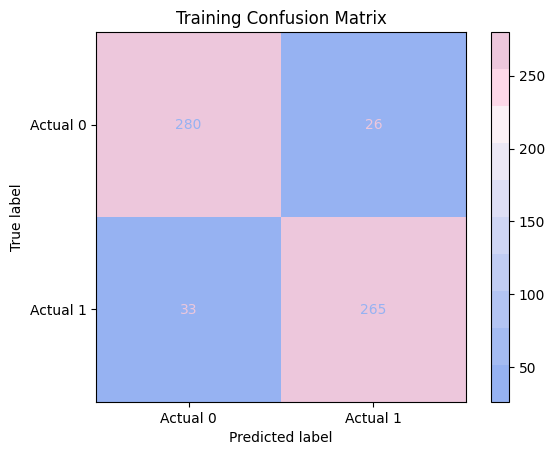

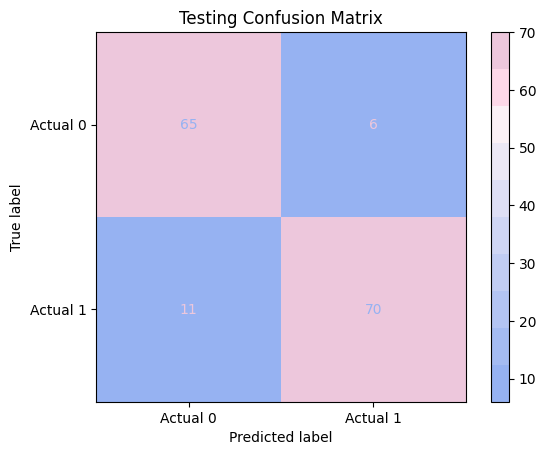

In [87]:
diabetes_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
y = df.Outcome
X = df[diabetes_features]

# Color palette 
myPalette2 = [
    "#96b2f2", "#a4bbf2", "#b3c4f3", "#c1cdf3", "#cfd6f4",
    "#dedff5", "#ece8f5", "#fbf1f6", "#fdd8e8", "#edc7dc"
]

# Splitting the data with a more typical test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

# Initializing the Decision Tree model with a max depth to prevent overfitting
diabetes_model = DecisionTreeClassifier(max_depth = 5, random_state = 3)

# Training the model
diabetes_model.fit(X_train, y_train)

# Making predictions
train_predictions = diabetes_model.predict(X_train)
test_predictions = diabetes_model.predict(X_test)

# Evaluating the model on the training data
train_accuracy = accuracy_score(y_train, train_predictions)
train_conf_matrix = confusion_matrix(y_train, train_predictions)
train_class_report = classification_report(y_train, train_predictions)

# Evaluating the model on the testing data
test_accuracy = accuracy_score(y_test, test_predictions)
test_conf_matrix = confusion_matrix(y_test, test_predictions)
test_class_report = classification_report(y_test, test_predictions)

# Printing the evaluation metrics
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Training Confusion Matrix:\n", train_conf_matrix)
print("Testing Confusion Matrix:\n", test_conf_matrix)
print("Training Class Report:\n", train_class_report)
print("Testing Class Report:\n", test_class_report)

# Create a custom colormap
cmap = mcolors.ListedColormap(myPalette2)

# Visualizing the training confusion matrix
disp_train = ConfusionMatrixDisplay(confusion_matrix=train_conf_matrix, display_labels=['Actual 0', 'Actual 1'])
disp_train.plot(cmap = cmap)
plt.title('Training Confusion Matrix')
plt.show()

# Visualizing the testing confusion matrix
disp_test = ConfusionMatrixDisplay(confusion_matrix=test_conf_matrix, display_labels=['Actual 0', 'Actual 1'])
disp_test.plot(cmap = cmap)
plt.title('Testing Confusion Matrix')
plt.show()

<h1> Correlation Matrix </h1>

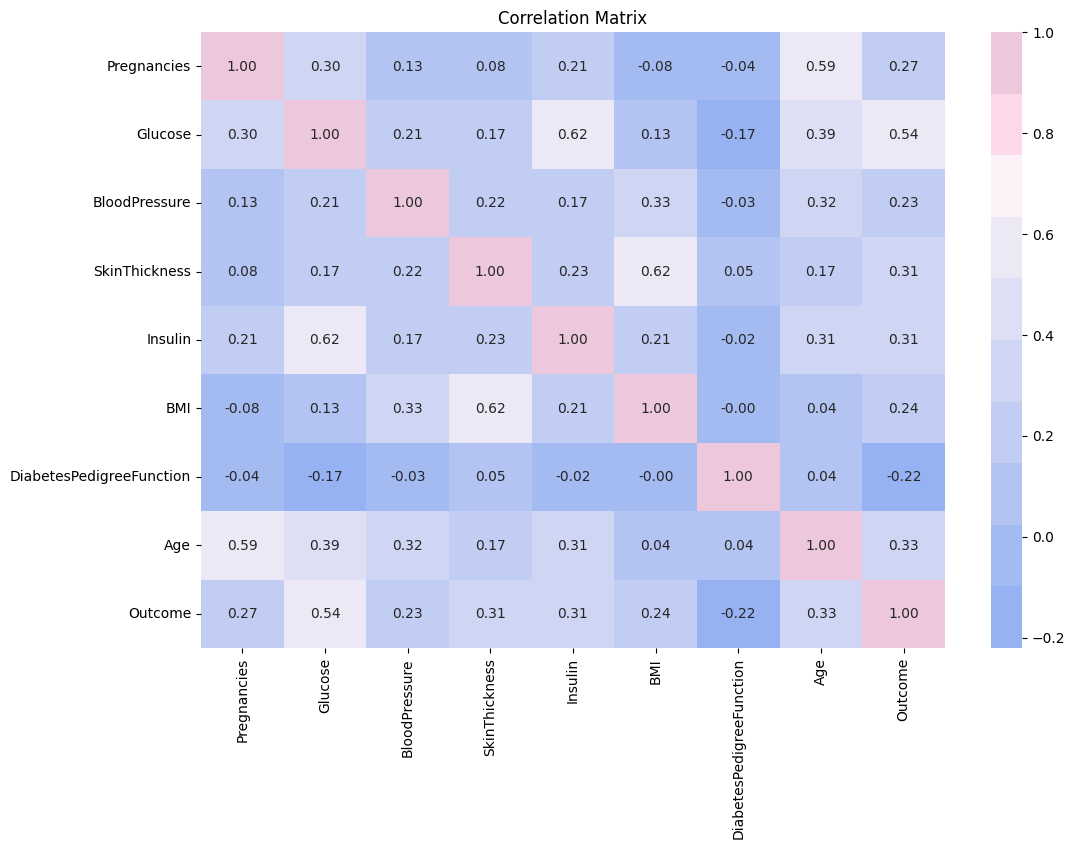

In [88]:
#Calculate the correlation matrix
correlation_matrix = df.corr()

#Color palette
# myPalette2 = [
#     "#96b2f2", "#a4bbf2", "#b3c4f3", "#c1cdf3", "#cfd6f4",
#     "#dedff5", "#ece8f5", "#fbf1f6", "#fdd8e8", "#edc7dc"
# ]

#Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=myPalette2, fmt='0.2f')

plt.title('Correlation Matrix')
plt.show()

<h1> ROC Graph </h1>

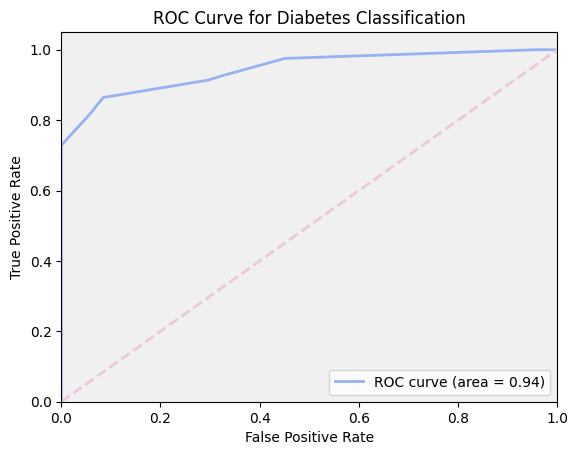

In [89]:
# Make predictions
y_pred_proba = diabetes_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()

#Get the curr axes & change bg color
ax = plt.gca()
ax.set_facecolor('#f0f0f0')  

plt.plot(fpr, tpr, color='#96b2f2', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#edc7dc', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Classification')
plt.legend(loc="lower right")
plt.show()
